# Lead Scoring Case Study

### Brief of the case study
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

### Case Study Objectve
Management want to identify the most "POTENTIAL LEADS" or the "HOT LEADS", that will help to increase the over all conversion rates to 80% as well as the productivity of the sales team will go up

### Approach followed
- Reading all libaries
- Reading & understanding the data
- Data Cleaning
- Getting infrences after data cleaning
- Scaling the data
- Building the model
- ROC Curve
- Checking confusion matrix
- Final conclusion

## Step 1: Importing and Understanding Data

In [192]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Model Building
import statsmodels.api as sm

# Display all rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 

In [193]:
#read the csv file
df_leads=pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [194]:
#shape of the data
df_leads.shape

(9240, 37)

**The dataset is having 9240 rows and 37 columns**

In [195]:
# info of the dataset
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**There are 7 numerical variables columns and remaining 30 columns seem to have categorical variables.**

In [196]:
#describe of the datas set
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Preparation and Cleaning

Many of the categorical variables have a level called 'SELECT' which needs to be handled. We will replace this value with NaN as its as good as a null value. The value SELECT helps the user understand that a value has to be selected from the drop down.

In [197]:
#replacing select with NaN 
df_leads=df_leads.replace('Select',np.nan)

In [198]:
#check for the null values in each variables
df_leads.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

In [199]:
# calculate the % of null values of each variables
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                      1.48 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Lead Source                                      0.39 
Lead Origin                                      0.00 
Lead Numbe

In [200]:
#drop the feature having missing data more than 70%
emptydata=list(round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)>70)

In [201]:
df_leads=df_leads.drop(df_leads.loc[:,emptydata].columns,axis=1)
df_leads.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article                                0   
X Education Forums          

In [202]:
# null values in percentage
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                      1.48 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Lead Source                                      0.39 
Lead Origin                                      0.00 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted 

#### Checking on the remaining columns which have NULL values and imputing them.

In [203]:
# Lead Quality Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
df_leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance    637 
Worst                601 
Low in Relevance     583 
Name: Lead Quality, dtype: int64

**Lead Quality is an important variable for analysis, so based on the values we can impute NaN values with "Not Sure" . This will help sales person to focus on converting Not Sure by constant marketing compaign like telecalling, SMS, EMail.**

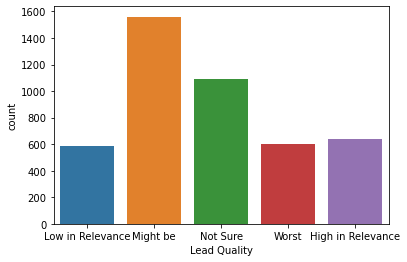

In [204]:
sns.countplot(df_leads['Lead Quality'])
plt.show()

In [205]:
# putting Not Sure instead of Null values
df_leads['Lead Quality']=df_leads['Lead Quality'].replace(np.nan,'Not Sure')
df_leads['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance    637 
Worst                601 
Low in Relevance     583 
Name: Lead Quality, dtype: int64

In [206]:
df_leads['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0    599 
17.0    579 
20.0    308 
19.0    245 
14.0    226 
13.0    204 
12.0    22  
11.0    9   
Name: Asymmetrique Profile Score, dtype: int64

In [207]:
sum(df_leads['Asymmetrique Profile Score'].isnull())

4218

#### Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score and Asymmetrique Profile Score all of them have same percentage of missing values.

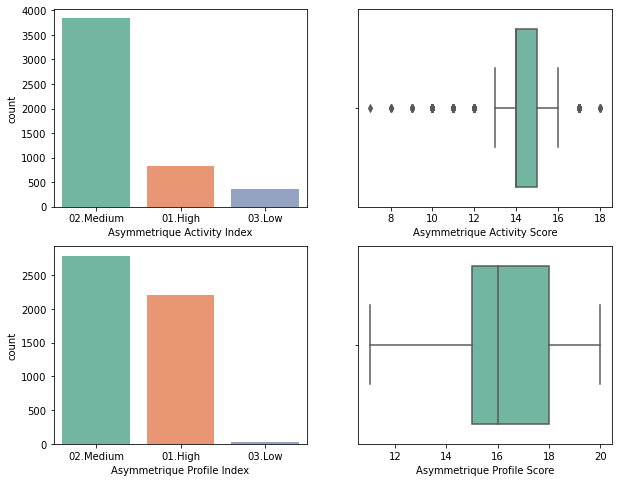

In [208]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.countplot(df_leads['Asymmetrique Activity Index'], ax = axs[0,0],palette="Set2")
plt2 = sns.boxplot(df_leads['Asymmetrique Activity Score'], ax = axs[0,1],palette="Set2")
plt3 = sns.countplot(df_leads['Asymmetrique Profile Index'], ax = axs[1,0],palette="Set2")
plt4 = sns.boxplot(df_leads['Asymmetrique Profile Score'], ax = axs[1,1],palette="Set2")
plt.show()

As the missing percentage is as high as 45% and based on the plots above we notice too much variation in the data, we cannot impute the missing values with on amongst High, Medium and Low. Hence, we will create a new category as "Unknown"

In [209]:
df_leads=df_leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis=1)
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


### City

In [210]:
df_leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

In [211]:
sum(df_leads['City'].isnull())

3669

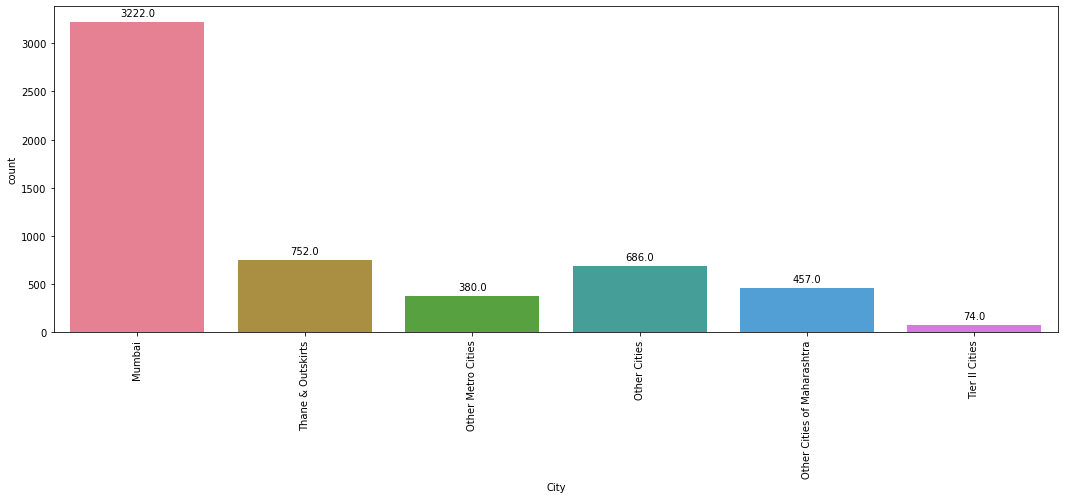

In [212]:
# Defining a re-usable function to draw count plots as we would need them multiple times in our analysis

def mycountPlotFunc(x):
    plt.figure(figsize=(18, 6))
    splot=sns.countplot(x,palette="husl")    
    plt.xticks(rotation=90)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

mycountPlotFunc(df_leads['City'])

**Out of 5571 data points in city column 3222 entries are from Mumbai, which is majority compared to others. But as we have different countries in the country column , so specifically defining any city would not be a proper decission, so let's just convert them to "Unknown"**

In [213]:
df_leads.City=df_leads.City.replace(np.nan,'Unknown')

In [214]:
df_leads.City.value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

### Specialization

In [215]:
df_leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness               73 
E-Business                           57 
Services Excellence                  40 
Name: Specialization, dtype: int64

In [216]:
sum(df_leads.Specialization.isnull())

3380

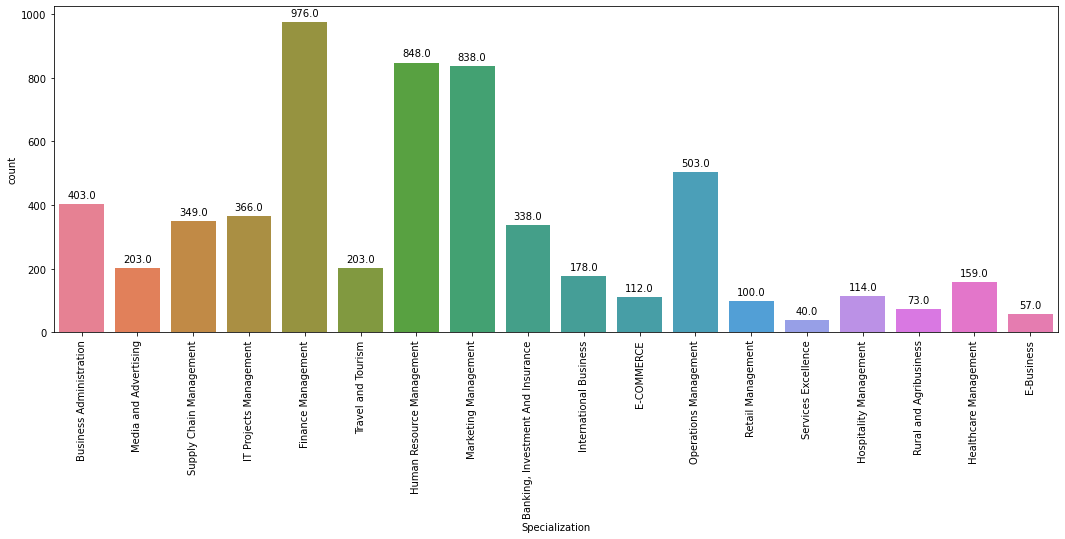

In [217]:
mycountPlotFunc(df_leads['Specialization'])

**The user may not have entered their specializations as it may not have been present in the list. We can impute them aa "Unknown".**

In [218]:
df_leads.Specialization=df_leads.Specialization.replace(np.nan,'Others')

### Tags

In [219]:
df_leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                          513 
Already a student                                    465 
Closed by Horizzon                                   358 
switched off                                         240 
Busy                                                 186 
Lost to EINS                                         175 
Not doing further education                          145 
Interested  in full time MBA                         117 
Graduation in progress                               111 
invalid number                                       83  
Diploma holder (Not Eligible)                        63  
wrong number given                                   47  
opp hangup                                           33  
number not provided                                  27  
in touch with EINS                                   12  
Lost to Others

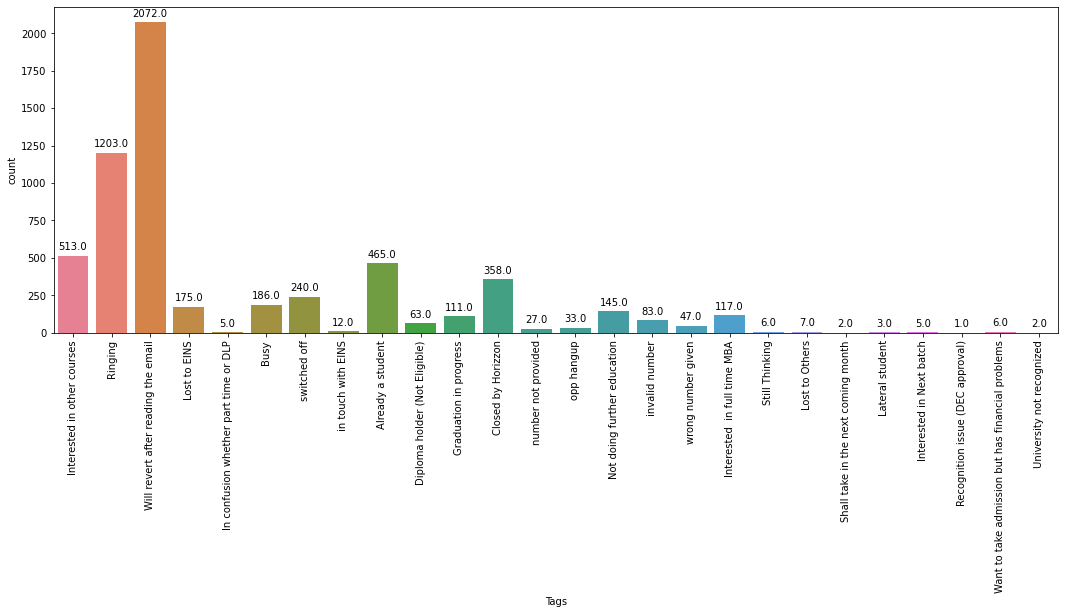

In [220]:
mycountPlotFunc(df_leads['Tags'])

**Replacing the Null values with value of "Unknown"**

In [221]:
sum(df_leads.Tags.isnull())

3353

In [222]:
df_leads.Tags=df_leads.Tags.replace(np.nan,'Will revert after reading the email')

df_leads.Tags=df_leads.Tags.replace(np.nan,'Unknown')

In [223]:
df_leads.Tags.value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                          513 
Already a student                                    465 
Closed by Horizzon                                   358 
switched off                                         240 
Busy                                                 186 
Lost to EINS                                         175 
Not doing further education                          145 
Interested  in full time MBA                         117 
Graduation in progress                               111 
invalid number                                       83  
Diploma holder (Not Eligible)                        63  
wrong number given                                   47  
opp hangup                                           33  
number not provided                                  27  
in touch with EINS                                   12  
Lost to Others

### What matters most to you in choosing a course

In [224]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

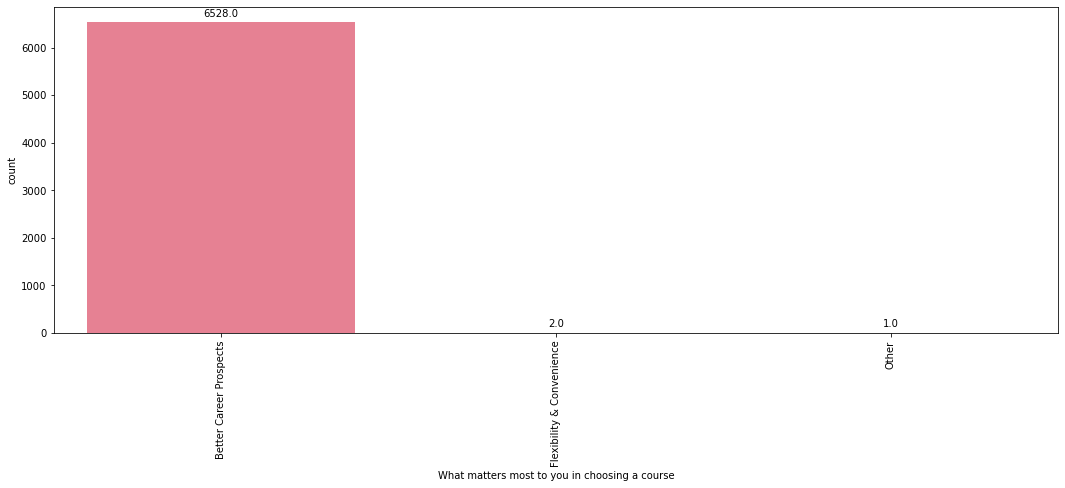

In [225]:
mycountPlotFunc(df_leads['What matters most to you in choosing a course'])

**From the above we can see that 99.5% reswponses for "What matters most to you in choosing a course" went for Better Career Prospects. so we can change the null values to 'Better Career Prospects'(imputing the categorical variable with the modal value).**

In [226]:
df_leads['What matters most to you in choosing a course']=df_leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [227]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

### What is your current occupation

In [228]:
df_leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What is your current occupation, dtype: int64

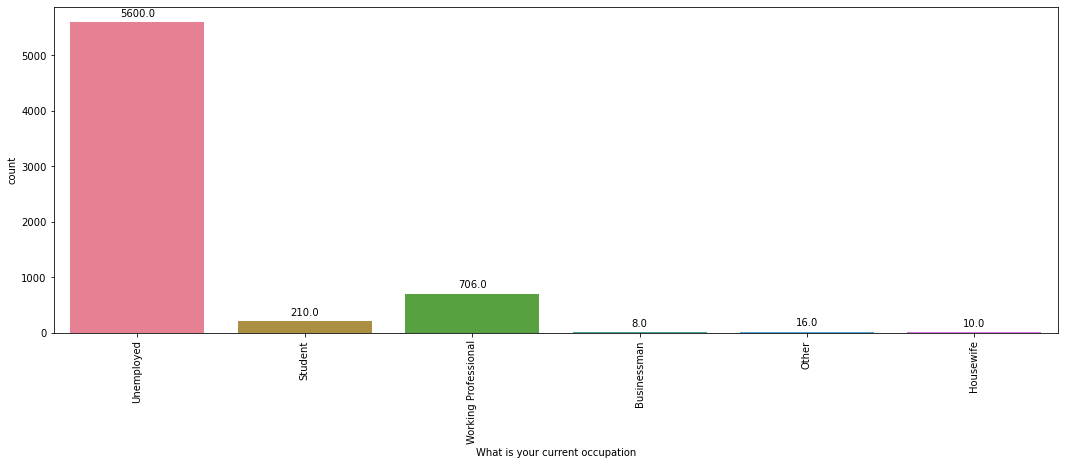

In [229]:
mycountPlotFunc(df_leads['What is your current occupation'])

**5600 entries are of 'Unemployed', so we can impute the Null values with the modal value i.e "Unemployed"**

In [230]:
df_leads['What is your current occupation']=df_leads['What is your current occupation'].replace(np.nan,'Unemployed')

### Country

In [231]:
sum(df_leads.Country=='India')/len(df_leads.index)

0.7025974025974026

**It's clearly seen that among all the entries 'India' has highest number of entries. So let's convert the null values to 'India'**

In [232]:
df_leads.Country=df_leads.Country.replace(np.nan,'India')

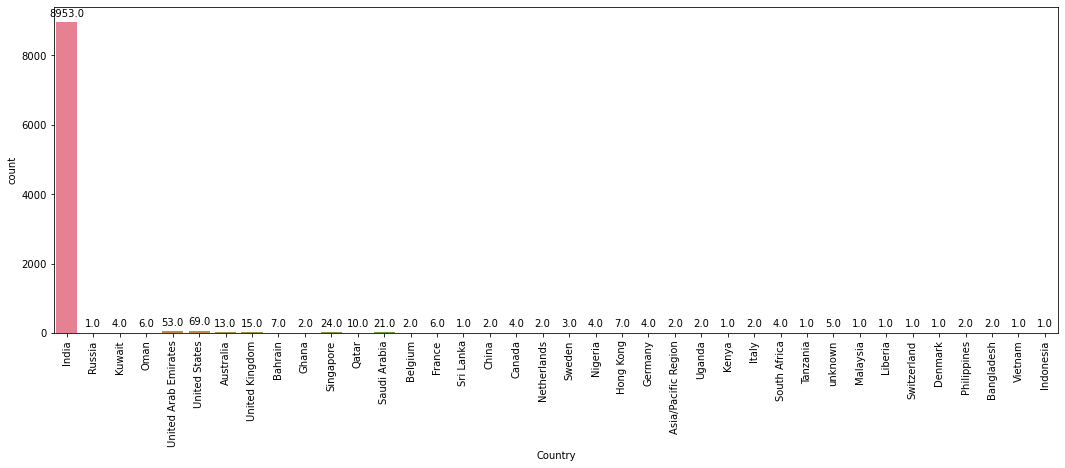

In [233]:
mycountPlotFunc(df_leads['Country'])

In [234]:
# rest few columns have very low missing values, so we can just remove those rows
df_leads=df_leads.dropna()

In [235]:
df_leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [236]:
#Drop the redundant features as Prospect ID is simillar as Lead Number
df_leads=df_leads.drop('Prospect ID',axis=1)

In [237]:
# Checking the values for reponses
df_leads['Do Not Email'].value_counts()

No     8358
Yes    716 
Name: Do Not Email, dtype: int64

In [238]:
df_leads['Do Not Call'].value_counts()

No     9072
Yes    2   
Name: Do Not Call, dtype: int64

In [239]:
df_leads['Search'].value_counts()

No     9060
Yes    14  
Name: Search, dtype: int64

In [240]:
df_leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [241]:
df_leads['Newspaper Article'].value_counts()

No     9072
Yes    2   
Name: Newspaper Article, dtype: int64

In [242]:
df_leads['X Education Forums'].value_counts()

No     9073
Yes    1   
Name: X Education Forums, dtype: int64

In [243]:
df_leads['Newspaper'].value_counts()

No     9073
Yes    1   
Name: Newspaper, dtype: int64

In [244]:
df_leads['Digital Advertisement'].value_counts()

No     9070
Yes    4   
Name: Digital Advertisement, dtype: int64

In [245]:
df_leads['Through Recommendations'].value_counts()

No     9067
Yes    7   
Name: Through Recommendations, dtype: int64

In [246]:
# Applying lambda to captilize the first character of the column 'Lead Source'
df_leads['Lead Source']=df_leads['Lead Source'].apply(lambda x:x.capitalize())

df_leads['Lead Source'].value_counts()

Google               2873
Direct traffic       2543
Olark chat           1753
Organic search       1154
Reference            443 
Welingak website     129 
Referral sites       125 
Facebook             31  
Bing                 6   
Click2call           4   
Press_release        2   
Live chat            2   
Social media         2   
Welearnblog_home     1   
Nc_edm               1   
Testone              1   
Welearn              1   
Pay per click ads    1   
Youtubechannel       1   
Blog                 1   
Name: Lead Source, dtype: int64

#### All the NULL values have now been handled. We can now proceed with Data Preparation

### DATA PREPARATION

Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0.

In [247]:
# Function to convert Yes to 1 and No to 0
def mapping(x):
    return x.map({'Yes':1,'No':0})

In [248]:
# List of variables to map
col_lists=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque','Update me on Supply Chain Content']

In [249]:
df_leads[col_lists]=df_leads[col_lists].apply(mapping)

In [250]:
df_leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Unknown,0,0,Modified
1,660728,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Unknown,0,0,Email Opened
2,660727,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


### Check Imbalance

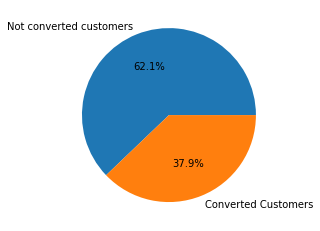

In [251]:
# Finding the imbalance in our Target variable
x = df_leads['Converted'].value_counts()[0] # not converted customers
y = df_leads['Converted'].value_counts()[1] # converted customers
plt.pie([x,y],labels=['Not converted customers','Converted Customers'],autopct='%1.1f%%')
plt.show()

# Bivariate Analysis

### Lead Origin

In [252]:
# Defining a re-usable function to draw count plots as we would need them multiple times in our analysis

def mycountPlotFunc2(x):
    plt.figure(figsize=(12, 6))
    splot=sns.countplot(x,hue=df_leads['Converted'],palette="Set2")    
    plt.xticks(rotation=90)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')


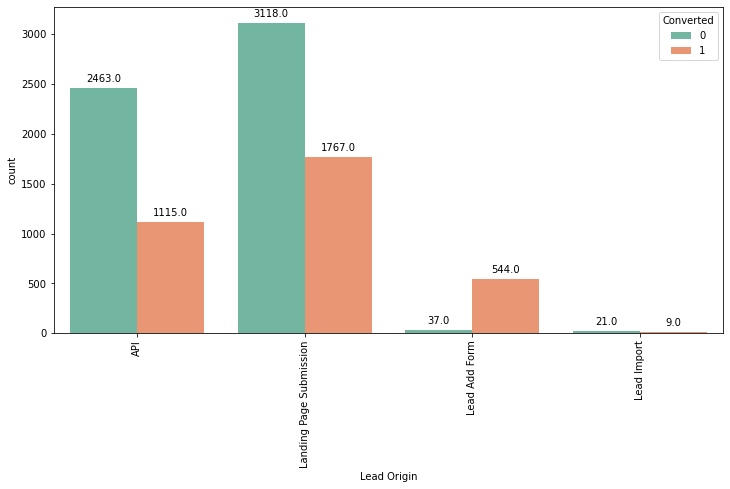

In [253]:
mycountPlotFunc2(df_leads['Lead Origin'])

**Inference**
- API has around 31% (1097/3538) conversion rate.

- Landing Page Submission has around 36% (1702/4735) conversion rate.

- Lead Add Form has around 93% (543/580) conversion rate.

- Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead conversions for API and Landing Page Submission origin.  More leads should be generated from Lead Add Form.

### Lead Source

In [254]:
df_leads['Lead Source'].value_counts()

Google               2873
Direct traffic       2543
Olark chat           1753
Organic search       1154
Reference            443 
Welingak website     129 
Referral sites       125 
Facebook             31  
Bing                 6   
Click2call           4   
Press_release        2   
Live chat            2   
Social media         2   
Welearnblog_home     1   
Nc_edm               1   
Testone              1   
Welearn              1   
Pay per click ads    1   
Youtubechannel       1   
Blog                 1   
Name: Lead Source, dtype: int64

In [255]:
df_leads['Lead Source']=df_leads['Lead Source'].replace('google','Google')
df_leads['Lead Source']=df_leads['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release','Social Media','welearnblog_Home','youtubechannel','NC_EDM','testone','blog','Pay per Click Ads','WeLearn'],'Others')

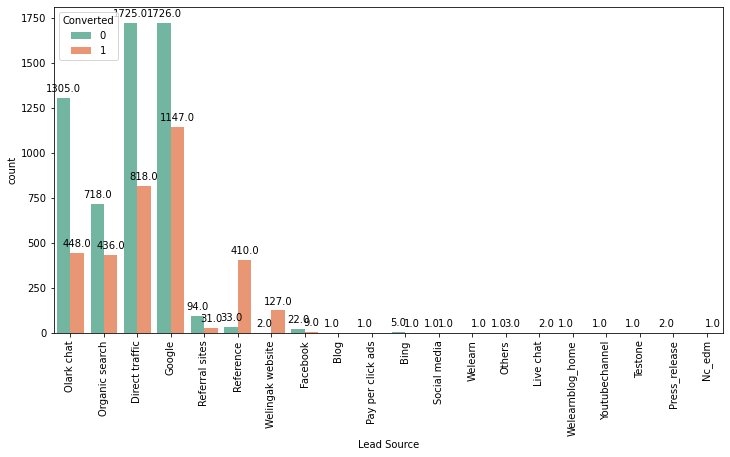

In [256]:
mycountPlotFunc2(df_leads['Lead Source'])

**Inference**
- We can conclude from the above graph that conversion rate is higher from 'Reference' and 'Welingak Website'.
- Google and Direct traffic are generating maximum number of leads.

### Last Activity

In [257]:
df_leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation         972 
Page Visited on Website         640 
Converted to Lead               428 
Email Bounced                   312 
Email Link Clicked              267 
Form Submitted on Website       116 
Unreachable                     90  
Unsubscribed                    59  
Had a Phone Conversation        25  
View in browser link Clicked    6   
Approached upfront              5   
Email Received                  2   
Email Marked Spam               2   
Visited Booth in Tradeshow      1   
Resubscribed to emails          1   
Name: Last Activity, dtype: int64

In [258]:
df_leads['Last Activity']=df_leads['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam',
                                                             'Resubscribed to emails','Visited Booth in Tradeshow'],'Others_activity')

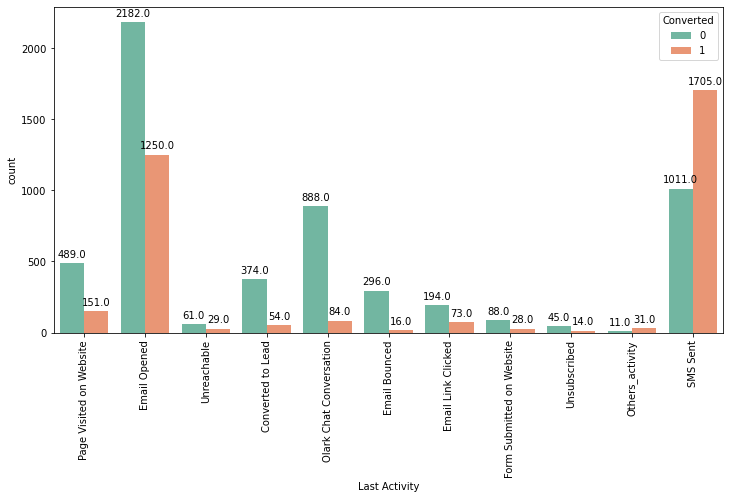

In [259]:
mycountPlotFunc2(df_leads['Last Activity'])

**Inference**
- Most number of people have opened the mail.
- Maximum number of conversions are coming from sms sent.
- Only around 6-8% of emails are bounced.

### Country

In [260]:
df_leads.Country.value_counts()

India                   8787
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
Oman                    6   
France                  6   
unknown                 5   
Nigeria                 4   
Canada                  4   
Germany                 4   
South Africa            4   
Kuwait                  4   
Sweden                  3   
Italy                   2   
Belgium                 2   
Ghana                   2   
Netherlands             2   
China                   2   
Asia/Pacific Region     2   
Uganda                  2   
Philippines             2   
Bangladesh              2   
Denmark                 1   
Russia                  1   
Tanzania                1   
Liberia                 1   
Vietnam                 1   
Sri Lanka               1   
Indonesia     

**India has the highest number of leads while for other countries its very minimal, hence nothing much can be inferred based on the countries.**

In [261]:
df_leads['Country']=df_leads.Country.apply(lambda x :'India' if x=='India' else 'Foreign Country')

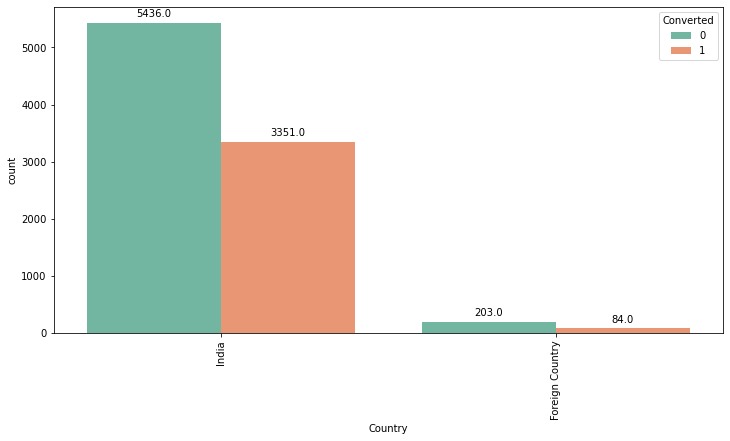

In [262]:
mycountPlotFunc2(df_leads['Country'])

### Specialization

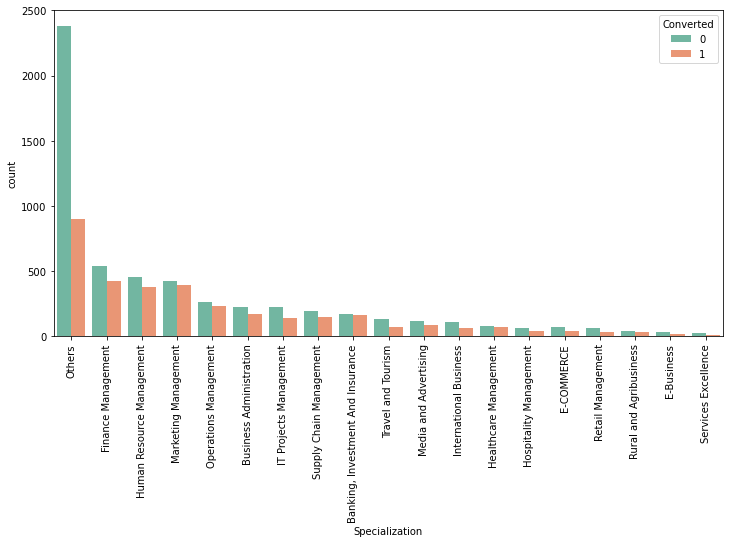

In [263]:
plt.figure(figsize=[12,6])
sns.countplot(df_leads['Specialization'],hue=df_leads['Converted'],order=df_leads['Specialization'].value_counts().index,palette="Set2")
plt.xticks(rotation=90)
plt.show()

### What is your current occupation

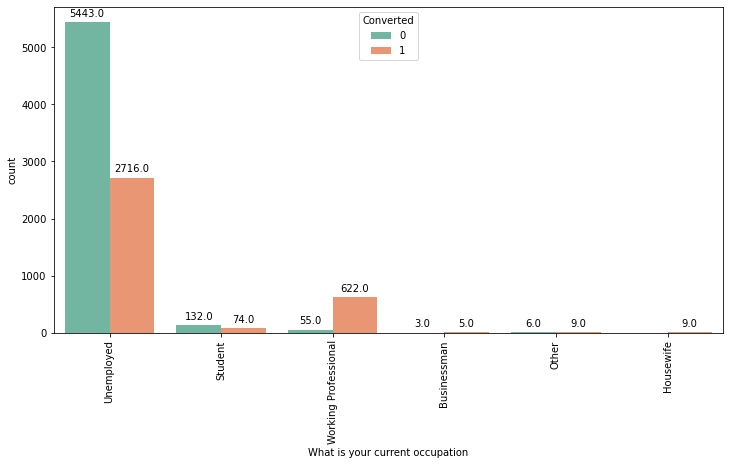

In [264]:
mycountPlotFunc2(df_leads['What is your current occupation'])

**Inference:** Number of leads on unemployeed are very high so this has to be focus are for converting more for upscaling for better job opportunity.

### What matters most to you in choosing a course

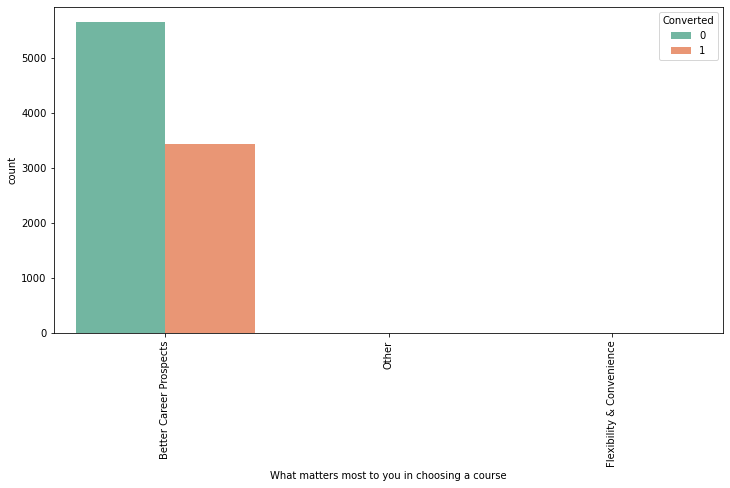

In [265]:
plt.figure(figsize=[12,6])
sns.countplot(df_leads['What matters most to you in choosing a course'],hue=df_leads['Converted'],order=df_leads['What matters most to you in choosing a course'].value_counts().index,palette="Set2")
plt.xticks(rotation=90)
plt.show()

### Tags

In [266]:
df_leads.Tags.value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                          509 
Already a student                                    465 
Closed by Horizzon                                   301 
switched off                                         240 
Busy                                                 185 
Lost to EINS                                         172 
Not doing further education                          145 
Interested  in full time MBA                         116 
Graduation in progress                               111 
invalid number                                       83  
Diploma holder (Not Eligible)                        63  
wrong number given                                   47  
opp hangup                                           33  
number not provided                                  25  
in touch with EINS                                   12  
Lost to Others

In [267]:
# Let's keep considerable last activities as such and club all others to "Other_Tags"
df_leads['Tags']=df_leads.Tags.replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

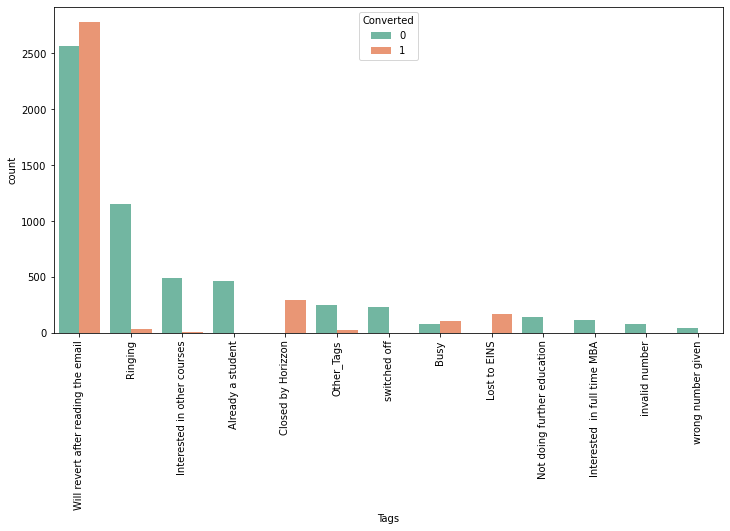

In [268]:
plt.figure(figsize=[12,6])
sns.countplot(df_leads['Tags'],hue=df_leads['Converted'],order=df_leads['Tags'].value_counts().index,palette="Set2")
plt.xticks(rotation=90)
plt.show()

**Inference**
- The conversion rate for "Will revert after reading the email" is good
- The conversion for leads who are interested in the course is very low, the marketing stratergies needs to be checked here.

### Lead Quality

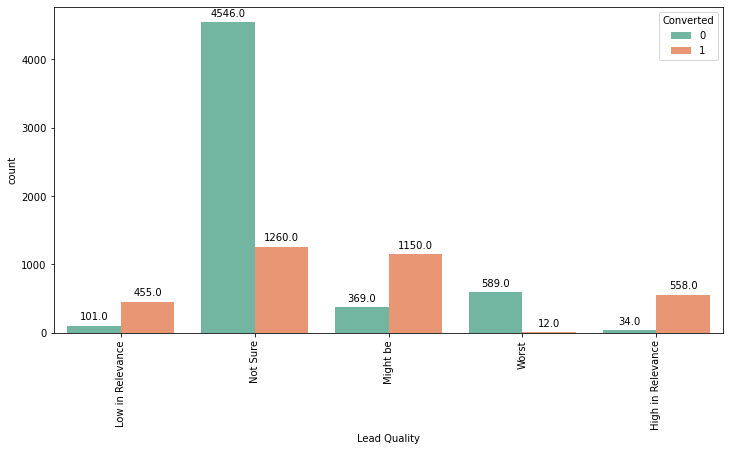

In [269]:
mycountPlotFunc2(df_leads['Lead Quality'])


**Inference**: All other Lead qualities have higher number of conversions apart from the "Not Sure" ones.

### City

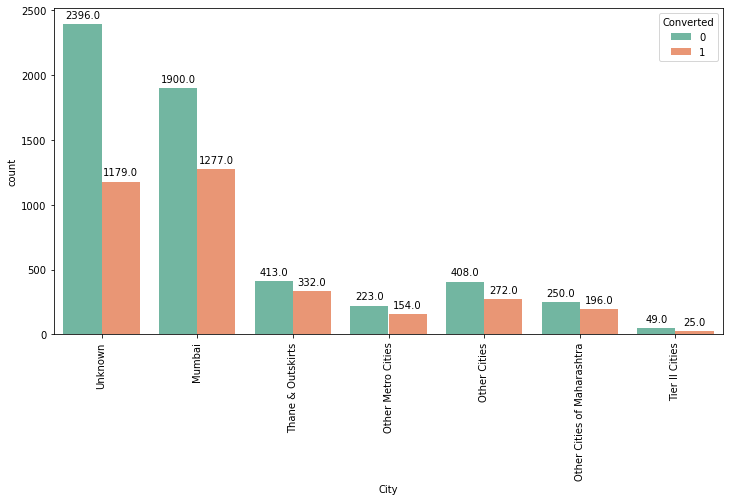

In [270]:
mycountPlotFunc2(df_leads['City'])

**Inference** All cities have low conversion rates.

### Last Notable Activity

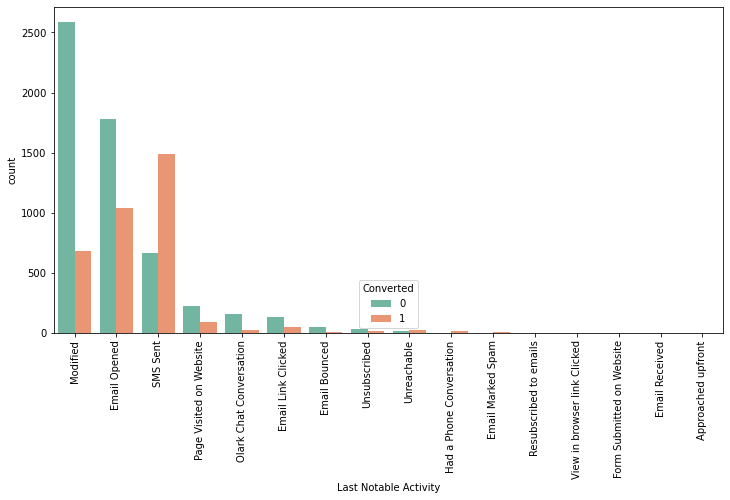

In [271]:
plt.figure(figsize=[12,6])
sns.countplot(df_leads['Last Notable Activity'],hue=df_leads['Converted'],order=df_leads['Last Notable Activity'].value_counts().index,palette="Set2")
plt.xticks(rotation=90)
plt.show()

**Inference** 
- SMS Sent has the highest conversion rates.
- Modified and Email Opened activities have high number of leads but low conversion rates

### TotalVisits

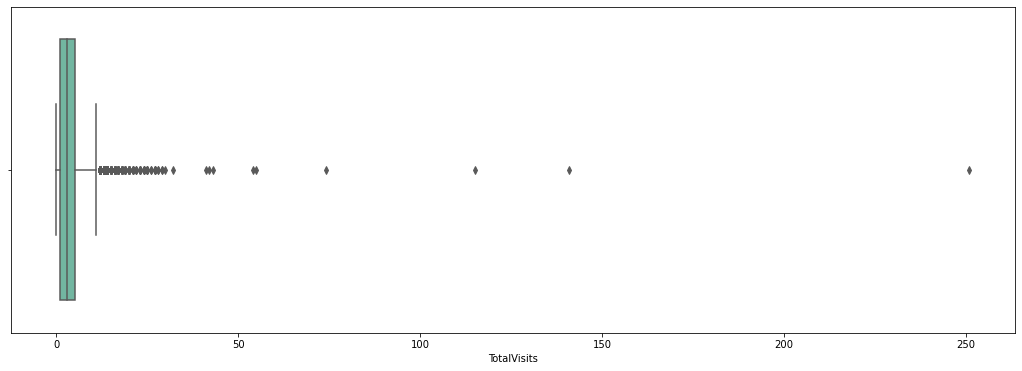

In [272]:
plt.figure(figsize=[18,6])
sns.boxplot(df_leads.TotalVisits,palette="Set2")
plt.show()

In [273]:
percentiles = df_leads['TotalVisits'].quantile([0.05,0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

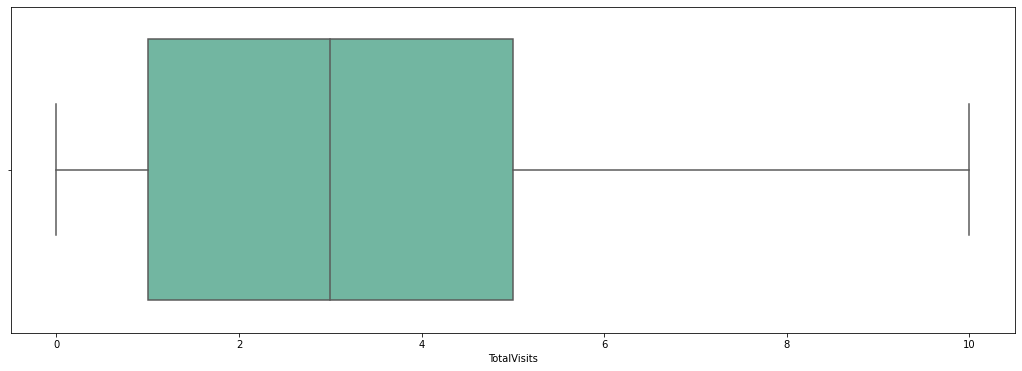

In [274]:
plt.figure(figsize=[18,6])
sns.boxplot(df_leads.TotalVisits,palette="Set2")
plt.show()

### Total Time Spent on Website

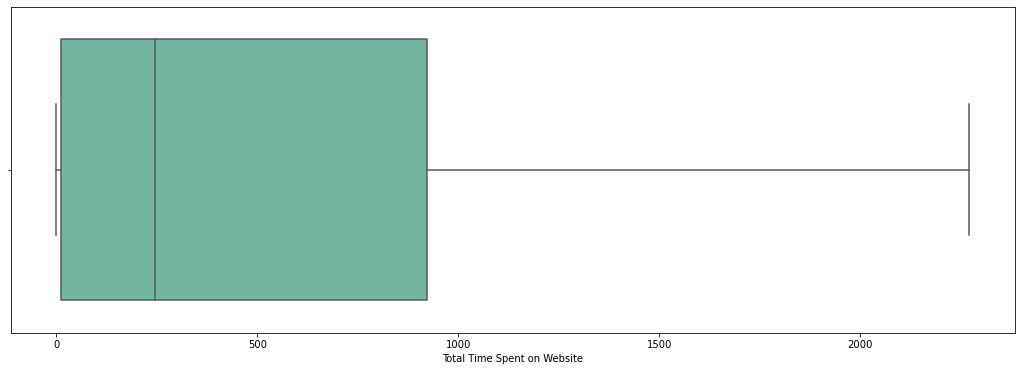

In [275]:
#boxplot for Total Time Spent On Website
plt.figure(figsize=[18,6])
sns.boxplot(df_leads['Total Time Spent on Website'],palette="Set2")
plt.show()

### Page Views Per Visit

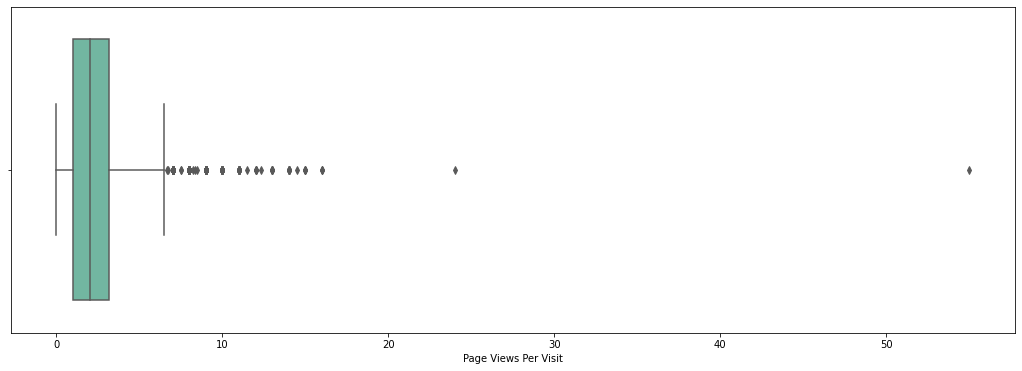

In [276]:
plt.figure(figsize=[18,6])
sns.boxplot(df_leads['Page Views Per Visit'],palette="Set2")
plt.show()

In [277]:
percentiles = df_leads['Page Views Per Visit'].quantile([0.05,0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

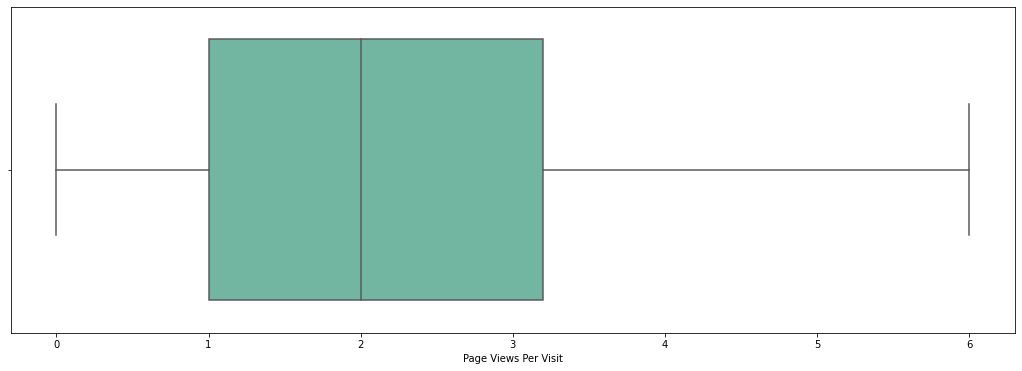

In [278]:
plt.figure(figsize=[18,6])
sns.boxplot(df_leads['Page Views Per Visit'],palette="Set2")
plt.show()

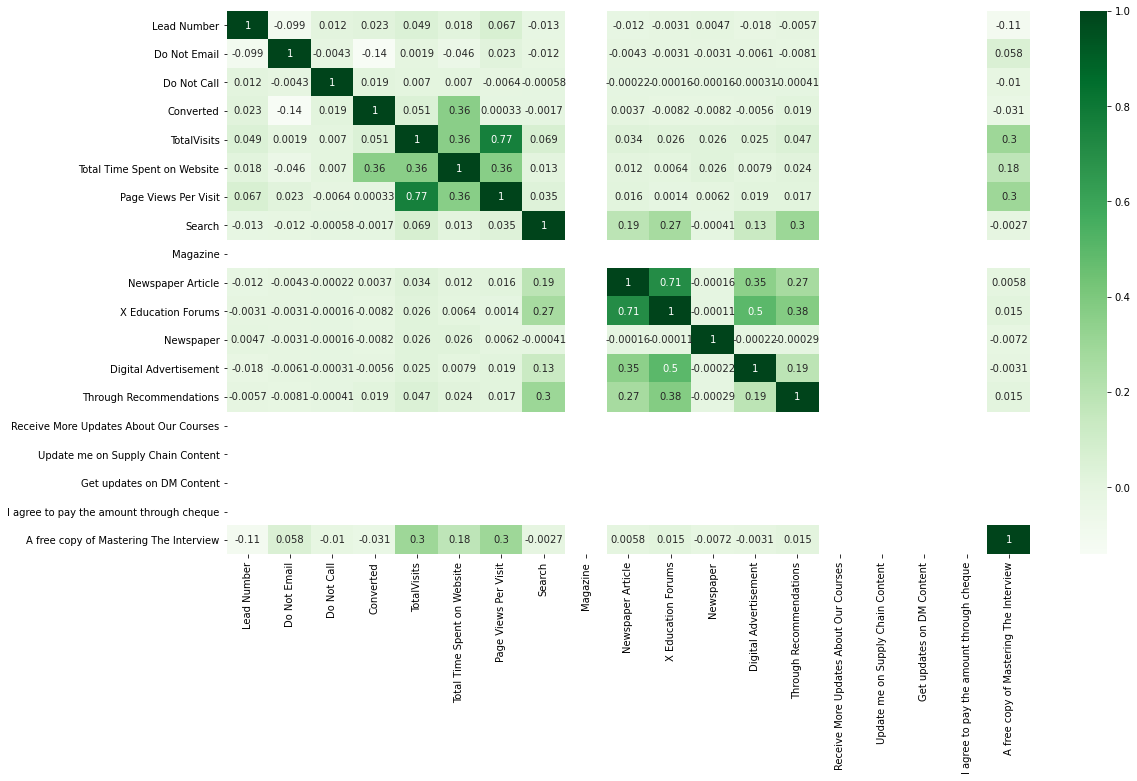

In [279]:
#heat map of the data set
plt.figure(figsize=[18,10])
sns.heatmap(df_leads.corr(),cmap='Greens',annot=True)
plt.show()

In [280]:
df_leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Based on the analysis we have seen that many columns are not adding any information to the model and will add biasness to the model hence we can drop them.**

In [281]:
df_leads=df_leads.drop(['Do Not Email',
       'Do Not Call',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview','City','Country'],axis=1)

In [282]:
df_leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,660737,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,660728,API,Organic search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


In [283]:
df_leads.shape

(9074, 13)

In [284]:
df_leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Last Notable Activity'],
      dtype='object')

#### Creating Dummy variables for categorical columns

In [285]:
#create dummy of the categorical datas
dummy=pd.get_dummies(df_leads[['Lead Origin', 'Lead Source',
        'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Last Notable Activity']],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [286]:
dummy.shape

(9074, 86)

In [287]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   9074 non-null   uint8
 1   Lead Origin_Lead Add Form                             9074 non-null   uint8
 2   Lead Origin_Lead Import                               9074 non-null   uint8
 3   Lead Source_Blog                                      9074 non-null   uint8
 4   Lead Source_Direct traffic                            9074 non-null   uint8
 5   Lead Source_Facebook                                  9074 non-null   uint8
 6   Lead Source_Google                                    9074 non-null   uint8
 7   Lead Source_Live chat                                 9074 non-null   uint8
 8   Lead Source_Nc_edm                                    9074 non-null   uint8
 9

In [288]:
#concating the dummies to the orginal data frame
df_leads=pd.concat([df_leads,dummy],axis=1)
df_leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [289]:
#drop the original features which are created dummies
df_leads=df_leads.drop(['Lead Origin', 'Lead Source',
        'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Last Notable Activity'],axis=1)

In [290]:
df_leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [291]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 91 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Blog                                      9074

In [292]:
df_leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [293]:
df_leads.shape

(9074, 91)

# Splitting the Dataset

In [294]:
X=df_leads.drop(['Lead Number','Converted'],axis=1)
y=df_leads['Converted']

In [295]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

# Feature Scaling

In [296]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [297]:
### Checking the Converted Rate
leads = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
leads

37.85541106458012

#### We have almost 38% Lead rate

# Model Building

In [298]:
import statsmodels.api as sm

In [299]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.2
Date:                Mon, 08 Feb 2021   Deviance:                       2518.4
Time:                        18:39:26   Pearson chi2:                 3.48e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.1673   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.1882      0.086      2.185      0.029       0.019       0.357
Total Time Spent on Website                              1.1455      0.063     18.060      0.000       1.021       1.270
Page Views Per Visit                                    -0.3255      0.098     -3.307      0.001      -0.518      -0.133
Lead Origin_Landing Page Submission                     -0.9989      0.221     -4.524      0.000      -1.432      -0.566
Lead Origin_Lead Add Form                               -2.7968      3.409     -0.820      0.412      -9.478       3.884
Lead Origin_Lead Import                                 29.5793   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Blog                                       -25.3513   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Direct traffic                              -1.2601      1.717     -0.734      0.463      -4.626       2.105
Lead Source_Facebook                                   -29.7130   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                      -1.0206      1.715     -0.595      0.552      -4.381       2.340
Lead Source_Live chat                                   26.0295   1.39e+05      0.000      1.000   -2.73e+05    2.73e+05
Lead Source_Nc_edm                                      24.7360   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Olark chat                                  -0.3434      1.720     -0.200      0.842      -3.715       3.028
Lead Source_Organic search                              -1.0041      1.719     -0.584      0.559      -4.373       2.365
Lead Source_Others                                       1.9056      4.252      0.448      0.654      -6.428      10.239
Lead Source_Pay per click ads                          -19.1379   2.16e+05  -8.86e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Press_release                              -25.1784   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Reference                                    2.8700      3.840      0.747      0.455      -4.656      10.396
Lead Source_Referral sites                              -1.3028      1.775     -0.734      0.463      -4.782       2.176
Lead Source_Social media                                 2.1420      6.736      0.318      0.750     -11.060      15.344
Lead Source_Testone                                    -19.1947   2.16e+05  -8.89e-05      1.000   -4.23e+05    4.23e+05
Lead Source_Welearn                                  -2.45

## Feature Selection Using RFE

In [300]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [301]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [302]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [303]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 43),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Blog', False, 37),
 ('Lead Source_Direct traffic', False, 30),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live chat', False, 54),
 ('Lead Source_Nc_edm', False, 19),
 ('Lead Source_Olark chat', False, 5),
 ('Lead Source_Organic search', False, 32),
 ('Lead Source_Others', False, 39),
 ('Lead Source_Pay per click ads', False, 74),
 ('Lead Source_Press_release', False, 44),
 ('Lead Source_Reference', False, 42),
 ('Lead Source_Referral sites', False, 29),
 ('Lead Source_Social media', False, 51),
 ('Lead Source_Testone', False, 72),
 ('Lead Source_Welearn', False, 75),
 ('Lead Source_Welearnblog_home', False, 40),
 ('Lead Source_Welingak website', True, 1),
 ('Lead Source_Youtubechannel'

In [304]:
col = X_train.columns[rfe.support_]

In [305]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Blog', 'Lead Source_Direct traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live chat',
       'Lead Source_Nc_edm', 'Lead Source_Olark chat',
       'Lead Source_Organic search', 'Lead Source_Others',
       'Lead Source_Pay per click ads', 'Lead Source_Press_release',
       'Lead Source_Reference', 'Lead Source_Referral sites',
       'Lead Source_Social media', 'Lead Source_Testone',
       'Lead Source_Welearn', 'Lead Source_Welearnblog_home',
       'Lead Source_Youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Others_activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',

### Assessing the model with StatsModels

## Model-2

In [306]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.8
Date:                Mon, 08 Feb 2021   Deviance:                       3179.6
Time:                        18:39:34   Pearson chi2:                 3.73e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8426      0.279     -3.018      0.003      -1.390      -0.295
Lead Origin_Lead Add Form                      1.0110      0.360      2.806      0.005       0.305       1.717
Lead Source_Welingak website                   3.4398      0.818      4.207      0.000       1.837       5.042
Last Activity_Email Bounced                   -1.7189      0.404     -4.256      0.000      -2.510      -0.927
What is your current occupation_Unemployed    -1.1027      0.235     -4.683      0.000      -1.564      -0.641
Tags_Busy                                      3.6120      0.333     10.840      0.000       2.959       4.265
Tags_Closed by Horizzon                        7.8234      0.763     10.258      0.000       6.329       9.318
Tags_Lost to EINS                              9.0321      0.755     11.961      0.000       7.552      10.512
Tags_Ringing                                  -1.9114      0.340     -5.618      0.000      -2.578      -1.245
Tags_Will revert after reading the email       3.7668      0.230     16.344      0.000       3.315       4.218
Tags_invalid number                          -23.3652   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_switched off                             -2.5790      0.587     -4.395      0.000      -3.729      -1.429
Tags_wrong number given                      -22.9878   3.16e+04     -0.001      0.999    -6.2e+04     6.2e+04
Lead Quality_Not Sure                         -3.3333      0.129    -25.797      0.000      -3.587      -3.080
Lead Quality_Worst                            -3.9995      0.830     -4.817      0.000      -5.627      -2.372
Last Notable Activity_SMS Sent                 2.7503      0.121     22.669      0.000       2.513       2.988
==============================================================================================================
"""

In [307]:
col1=col.drop('Tags_invalid number',1)

## Model-3

In [308]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.5
Date:                Mon, 08 Feb 2021   Deviance:                       3190.9
Time:                        18:39:34   Pearson chi2:                 3.67e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9671      0.283     -3.423      0.001      -1.521      -0.413
Lead Origin_Lead Add Form                      1.0426      0.362      2.879      0.004       0.333       1.752
Lead Source_Welingak website                   3.4050      0.818      4.161      0.000       1.801       5.009
Last Activity_Email Bounced                   -1.7205      0.404     -4.259      0.000      -2.512      -0.929
What is your current occupation_Unemployed    -1.1455      0.238     -4.816      0.000      -1.612      -0.679
Tags_Busy                                      3.7941      0.332     11.442      0.000       3.144       4.444
Tags_Closed by Horizzon                        7.9768      0.763     10.454      0.000       6.481       9.472
Tags_Lost to EINS                              9.1904      0.756     12.163      0.000       7.709      10.671
Tags_Ringing                                  -1.7135      0.338     -5.072      0.000      -2.376      -1.051
Tags_Will revert after reading the email       3.9315      0.231     17.006      0.000       3.478       4.385
Tags_switched off                             -2.3747      0.585     -4.058      0.000      -3.522      -1.228
Tags_wrong number given                      -20.7930   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3241      0.129    -25.781      0.000      -3.577      -3.071
Lead Quality_Worst                            -3.9952      0.831     -4.806      0.000      -5.625      -2.366
Last Notable Activity_SMS Sent                 2.7111      0.120     22.674      0.000       2.477       2.945
==============================================================================================================
"""

In [309]:
col2=col1.drop('Tags_wrong number given',1)

## Model-4

In [310]:
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.5
Date:                Mon, 08 Feb 2021   Deviance:                       3195.0
Time:                        18:39:34   Pearson chi2:                 3.68e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0196      0.283     -3.598      0.000      -1.575      -0.464
Lead Origin_Lead Add Form                      1.0547      0.363      2.904      0.004       0.343       1.766
Lead Source_Welingak website                   3.3928      0.819      4.144      0.000       1.788       4.997
Last Activity_Email Bounced                   -1.7237      0.404     -4.268      0.000      -2.515      -0.932
What is your current occupation_Unemployed    -1.1621      0.239     -4.865      0.000      -1.630      -0.694
Tags_Busy                                      3.8681      0.330     11.714      0.000       3.221       4.515
Tags_Closed by Horizzon                        8.0424      0.763     10.542      0.000       6.547       9.538
Tags_Lost to EINS                              9.2575      0.755     12.256      0.000       7.777      10.738
Tags_Ringing                                  -1.6369      0.336     -4.868      0.000      -2.296      -0.978
Tags_Will revert after reading the email       4.0009      0.230     17.382      0.000       3.550       4.452
Tags_switched off                             -2.2963      0.584     -3.931      0.000      -3.441      -1.151
Lead Quality_Not Sure                         -3.3232      0.129    -25.790      0.000      -3.576      -3.071
Lead Quality_Worst                            -3.9854      0.833     -4.787      0.000      -5.617      -2.354
Last Notable Activity_SMS Sent                 2.7013      0.119     22.682      0.000       2.468       2.935
==============================================================================================================
"""

In [311]:
col2

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [312]:
col3=col2

### Checking for VIF

In [313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [314]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak website,1.34
5,Tags_Closed by Horizzon,1.25
10,Lead Quality_Not Sure,1.17
4,Tags_Busy,1.15
6,Tags_Lost to EINS,1.08
2,Last Activity_Email Bounced,1.07
9,Tags_switched off,1.05
11,Lead Quality_Worst,1.03
0,Lead Origin_Lead Add Form,0.65
12,Last Notable Activity_SMS Sent,0.21


In [315]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.181824
1012    0.112478
9226    0.000791
4750    0.768043
7987    0.977082
1281    0.989234
2880    0.181824
4971    0.743554
7536    0.860471
1248    0.000791
dtype: float64

In [316]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.81823840e-01, 1.12478017e-01, 7.90709314e-04, 7.68043129e-01,
       9.77081512e-01, 9.89234041e-01, 1.81823840e-01, 7.43554204e-01,
       8.60471060e-01, 7.90709314e-04])

### Creating a dataframe with the actual converted and the predicted probabilities

In [317]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.181824,3009
1,0,0.112478,1012
2,0,0.000791,9226
3,1,0.768043,4750
4,1,0.977082,7987


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [318]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.181824,3009,0
1,0,0.112478,1012,0
2,0,0.000791,9226,0
3,1,0.768043,4750,1
4,1,0.977082,7987,1


In [319]:
from sklearn import metrics

**Confusion matrix**

In [320]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3747  158]
 [ 353 2093]]


In [321]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9195402298850575


## Metrics beyond simply accuracy

In [322]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

**Sensitivity**

In [323]:
#lets check sensitivity of the model
TP/float(TP+FN)

0.8556827473426002

**Specificity**

In [324]:
#lets check the specificity
TN/float(TN+FP)

0.9595390524967989

**False Positive Rate**

In [325]:
#lets check false positive rate
FP/float(FP+TN)

0.04046094750320103

**False Negative Rate**

In [326]:
# lets checck False Negative rate 
FN/float(FN+TP)

0.14431725265739984

**Precision**

In [327]:
#lets check the precision
TP/float(TP+FP)

0.929808973789427

In [328]:
from sklearn.metrics import precision_score, recall_score

In [329]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)


0.929808973789427

**Recall**

In [330]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8556827473426002

## Plotting the ROC Curve

In [331]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [332]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

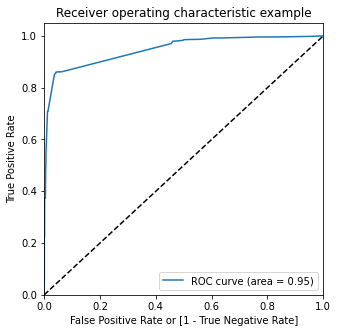

In [333]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##  Finding Optimal Cutoff Point

In [334]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1


In [335]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.385136  1.000000  0.000000
0.1  0.1   0.689183  0.982829  0.505250
0.2  0.2   0.908203  0.861406  0.937516
0.3  0.3   0.919855  0.860589  0.956978
0.4  0.4   0.919383  0.858953  0.957234
0.5  0.5   0.919540  0.855683  0.959539
0.6  0.6   0.919855  0.854456  0.960819
0.7  0.7   0.920170  0.851594  0.963124
0.8  0.8   0.879861  0.709730  0.986428
0.9  0.9   0.819399  0.540883  0.993854


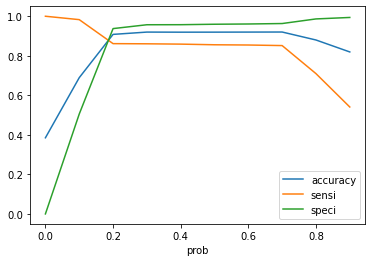

In [336]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
#plt.vlines(x=0.18, ymax=1, ymin=0, colors="r")
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability

In [337]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1,1


#### Assigning Lead Score

In [338]:
y_train_pred_final['Lead Score']=y_train_pred_final.Converted_Prob.map(lambda x : round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0,1,77
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1,1,98
5,1,0.989234,1281,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.181824,2880,0,1,1,0,0,0,0,0,0,0,0,0,18
7,1,0.743554,4971,1,1,1,1,1,1,1,1,1,0,0,1,74
8,1,0.860471,7536,1,1,1,1,1,1,1,1,1,1,0,1,86
9,0,0.000791,1248,0,1,0,0,0,0,0,0,0,0,0,0,0


In [339]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9082034325303102

In [340]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3661,  244],
       [ 339, 2107]], dtype=int64)

In [341]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [342]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8614063777596075

In [343]:
# Let us calculate specificity
TN / float(TN+FP)

0.9375160051216389

In [344]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.06248399487836107


In [345]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8962143768609102


In [346]:
# Negative predictive value
print (TN / float(TN+ FN))

0.91525


## Precision and Recall

In [347]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8962143768609102

In [348]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8614063777596075

**F1 Score**

In [349]:
from sklearn.metrics import f1_score
f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8784657077340003

### Precision and recall tradeoff

In [350]:
from sklearn.metrics import precision_recall_curve

In [351]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

In [352]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

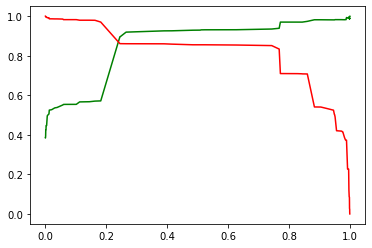

In [353]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [354]:
#scaling the teat set numerical variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.284772,-0.600595,0.955505,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.643547,1.887326,1.510766,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,-0.432779,-0.752879,-0.155018,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,1.719873,-0.587751,2.066027,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [355]:
X_test = X_test[col3]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak website,Last Activity_Email Bounced,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,1,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [356]:
X_test_sm = sm.add_constant(X_test)

In [357]:
y_test_pred = res.predict(X_test_sm)

In [358]:
y_test_pred[:10]

3271    0.181824
1490    0.951722
7936    0.181824
4216    0.999690
3830    0.181824
1800    0.951722
6507    0.011653
4821    0.000409
4223    0.996224
4714    0.181824
dtype: float64

In [359]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [360]:
# Let's see the head
y_pred_1.head()

,0
3271,0.181824
1490,0.951722
7936,0.181824
4216,0.999690
3830,0.181824


In [361]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [362]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [363]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [364]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [365]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.181824
1,1,1490,0.951722
2,0,7936,0.181824
3,1,4216,0.999690
4,0,3830,0.181824


In [366]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [367]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead Number','Converted','Converted_Prob']]

In [368]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3271,0,0.181824
1,1490,1,0.951722
2,7936,0,0.181824
3,4216,1,0.999690
4,3830,0,0.181824


In [369]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [370]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,3271,0,0.181824,0
1,1490,1,0.951722,1
2,7936,0,0.181824,0
3,4216,1,0.999690,1
4,3830,0,0.181824,0


In [371]:
y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].map(lambda x : round(x*100))
y_pred_final.head(20)

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,3271,0,0.181824,0,18
1,1490,1,0.951722,1,95
2,7936,0,0.181824,0,18
3,4216,1,0.999690,1,100
4,3830,0,0.181824,0,18
5,1800,1,0.951722,1,95
6,6507,0,0.011653,0,1
7,4821,0,0.000409,0,0
8,4223,1,0.996224,1,100
9,4714,0,0.181824,0,18


In [372]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9041498347410943

In [373]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1626,  108],
       [ 153,  836]], dtype=int64)

In [374]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [375]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8452982810920121

In [376]:
# Let us calculate specificity
TN / float(TN+FP)

0.9377162629757786

In [377]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.06228373702422145


In [378]:
# Positive predictive value 
print (TP / float(TP+FP))

0.885593220338983


In [379]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9139966273187183


In [380]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.885593220338983

In [381]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8452982810920121

**F1 Score**

In [382]:
from sklearn.metrics import f1_score
f1_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8649767201241594

### Final Result

|  | Train Data | Test Data |
| --- | --- | --- |
| Sensitivity | 86.14% | 84.52% |
| Specificity | 93.75% | 93.77% |

|  | Train Data | Test Data |
| --- | --- | --- |
| Precision |  89.62% | 88.55% |
| Recall |  86.14% | 84.52% |
| Accuracy | 90.82% | 90.41% |